In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed, FloatSlider, HBox, Layout, Button, Label, Output, VBox
from IPython.display import display

In [2]:
#GETTING AN ESTIMATE OF HOW MANY BLACK HOLES EACH PROJECTED DOT REPRESENTS

from scipy.integrate import quad
import numpy as np

rc=2.4 #kpc for ngc5005...
rho00=.31e9 #Msun/kpc^2 for ngc5533


NN=100 #number of blackholes visually projected onto image
#inner and outer radius of projected lil black holes, 
r1=10 #kpc, reasonable values visually given NGC6814's diameter
r2=15


def rho(r):
    X=r/rc
    Z = rho00/(X*(1+X)**2) #NFW (dark halo) density profile. I'm assuming Rs is cutoff radius. is this correct?
    return 4*np.pi*r**2*Z #and this is the integral to find the mass according to wikipedia
#https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile
Mg = quad(rho, r1, r2)[0] #total mass, in Msun, b/t r1 and r2

Mbh=3 #Msun, mass smaller than smallest black hole yet discovered
Nbh=Mg/Mbh #number of hypothetical tiny black holes that would have to exist b/t r1 and r2

scale=round(Nbh/NN,0)#the actual number of lil blackholes each projected dot represents
print('each black dot represents %.0f lil black holes' %scale)

each black dot represents 50828861 lil black holes


In [12]:
w=3970 #width of the square image
h=w
#center of galaxy:
c_x=w/2
c_y=h/2.2

#inner/outer radii, judging by eye
r1=.16*w
r2=.28*w
def f(N,V):

    r = np.random.uniform(r1,r2,int(N)) #generate random positions of black holes within inner/outer radii
    angle=np.random.uniform(0,2*np.pi,int(N)) #angle 0 to 360 degrees for fulle circle (donut)
    y=c_y+r*np.sin(angle) #y coordinates
    x=c_x+r*np.cos(angle) #x coordinates

    img = plt.imread("A_spiral_snowflake.jpg") #import special snowflake ngc 6814, which has visual diameter about 27.6kpc
    plt.figure(figsize=(10,12))
    plt.scatter(x,y,color="k",marker='.')
    #plt.scatter(0,100, color="blue")
    #plt.scatter(c_x,c_y,color="red")
    plt.imshow(img)
    plt.axis('off')
   
style = {'description_width': 'initial'}
layout = {'width':'600px'}

################################
######## Define Sliders ########
################################

best_M=NN
Max=300
stepN=.1*Max
Min=0

#mass of each black hole
V = FloatSlider(min=Min*scale, max=Max*scale, step=stepN*scale, 
                value=best_M, 
                description='size of lil black holes', 
                readout= True,
                readout_format='.2d', 
                orientation='horizontal', 
                style=style, layout=layout)

#number of projected black dots slider
N = FloatSlider(min=Min, max=Max, step=stepN, 
                value=best_M, 
                description='Number of lil black holes', 
                readout= True,
                readout_format='.2d', 
                orientation='horizontal', 
                style=style, layout=layout)




def interactive_plot(f):
    interact = interactive(f, N=N,V=V,continuous_update=False)
    return interact

print(interactive_plot(f).children)
VBox([interactive_plot(f)])

(FloatSlider(value=100.0, description='Number of lil black holes', layout=Layout(width='600px'), max=300.0, readout_format='.2d', step=30.0, style=SliderStyle(description_width='initial')), FloatSlider(value=100.0, description='size of lil black holes', layout=Layout(width='600px'), max=15248658300.0, readout_format='.2d', step=1524865830.0, style=SliderStyle(description_width='initial')), Output())


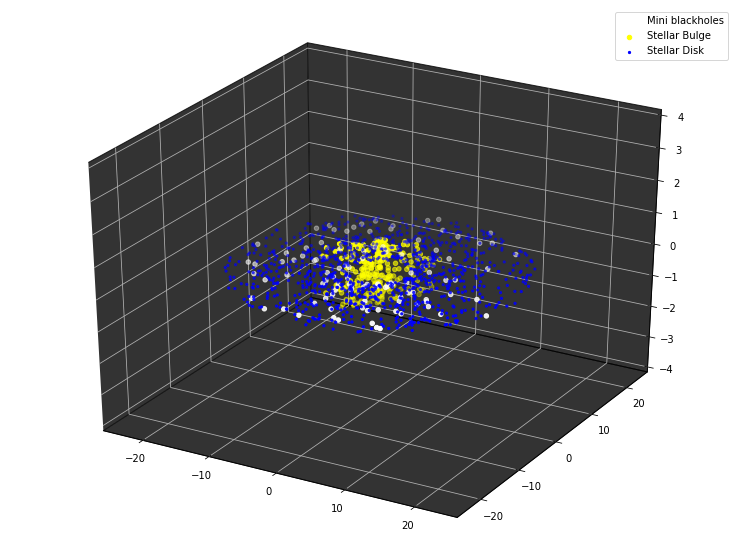

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

N=1000
X=25 #kpc
Y=X
Z=4 #kpc

#plotting disk
r1=Z
r2=X-5
r = np.random.uniform(r1,r2,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
yd=r*np.sin(angle) #y coordinates
xd=r*np.cos(angle) #x coordinates
zd=0

#plotting bulge
N=250
r2b=Z
r1b=-Z
rb = np.random.uniform(r1b,r2b,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
yb=rb*np.sin(angle)+rb*np.cos(angle) #y coordinates
xb=rb*np.cos(angle) #x coordinates
r1bb=-Z/4
r2bb=-r1
rbb = np.random.uniform(r1bb,r2bb,N)
zb=np.linspace(-1,1,N)

#plotting black holes
N=100
r1=Z
r2=X-5
r = np.random.uniform(r1,r2,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
ybh=r*np.sin(angle) #y coordinates
xbh=r*np.cos(angle) #x coordinates
zbh=0



# create the figure
fig = plt.figure(figsize=(13,10))
ax = plt.axes(projection='3d')

ax.scatter3D(xbh, ybh, zbh, color='white',label='Mini blackholes',zorder=1)
ax.scatter3D(yb, yb, zb, color='yellow',label='Stellar Bulge',zorder=2)
ax.scatter3D(xd, yd, zd, color='blue',marker='.',label='Stellar Disk',zorder=3)
ax.set_xlim((-X,X))
ax.set_ylim((-Y,Y))
ax.set_zlim((-Z,Z))
ax.legend()
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
ax.w_xaxis.set_pane_color((0, 0, 0, .8))
ax.w_yaxis.set_pane_color((0, 0, 0, .8))
ax.w_zaxis.set_pane_color((0, 0, 0, .8))

plt.show()

In [5]:
#GETTING AN ESTIMATE OF HOW MANY BLACK HOLES EACH PROJECTED DOT REPRESENTS

from scipy.integrate import quad
import numpy as np
rc=2.4 #kpc
rho00=.31e9 #Msun/kpc^2


N=100 #number of blackholes visually projected onto image
#inner and outer radius of projected lil black holes, 
r1=10 #kpc, reasonable values visually given NGC6814's diameter
r2=15


def rho(r):
    X=r/rc
    Z = rho00/(X*(1+X)**2) #NFW (dark halo) density profile. I'm assuming Rs is cutoff radius. is this correct?
    return 4*np.pi*r**2*Z #and this is the integral to find the mass according to wikipedia
#https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile
Mg = quad(rho, r1, r2)[0] #total mass, in Msun, b/t r1 and r2

Mbh=3 #Msun, mass smaller than smallest black hole yet discovered
Nbh=Mg/Mbh #number of hypothetical tiny black holes that would have to exist b/t r1 and r2

scale=round(Nbh/N,0)#the actual number of lil blackholes each projected dot represents
print('each black dot represents %.0f lil black holes' %scale)

each black dot represents 50828861 lil black holes


In [6]:
Mbhmin=.1 #Msun, minimum mass of lil black hole
Mbhmax=3.7 #Msun, max mass of lil black hole, slightly smaller than the smallest bh ever detected, as given here:

#https://www.scientificamerican.com/gallery/the-smallest-known-black-hole/
N = FloatSlider(min=Mbhmin, max=Mbhmax, step=.1, 
                value=Mbh, 
                description='Mass of each lil black hole {Msun}', 
                readout_format='.2e', 
                orientation='horizontal', 
                style=style, layout=layout)


def interactive_plot(f):
    interact = interactive(f, N = N, continuous_update=False)
    return interact
VBox([interactive_plot(f)])


In [7]:
w=3970 #width of the square image
h=w
#center of galaxy:
c_x=w/2
c_y=h/2.2

#inner/outer radii, judging by eye
r1=.16*w
r2=.28*w
def f(N):

    r = np.random.uniform(r1,r2,int(N)) #generate random positions of black holes within inner/outer radii
    angle=np.random.uniform(0,2*np.pi,int(N)) #angle 0 to 360 degrees for fulle circle (donut)
    y=c_y+r*np.sin(angle) #y coordinates
    x=c_x+r*np.cos(angle) #x coordinates

    img = plt.imread("A_spiral_snowflake.jpg") #import special snowflake ngc 6814, which has visual diameter about 27.6kpc
    plt.figure(figsize=(10,12))
    plt.scatter(x,y,color="k",marker='.')
    #plt.scatter(0,100, color="blue")
    #plt.scatter(c_x,c_y,color="red")
    plt.imshow(img)
    plt.axis('off')
   
style = {'description_width': 'initial'}
layout = {'width':'600px'}

################################
######## Define Sliders ########
################################
best_M=100

N = FloatSlider(min=0, max=300, step=10, 
                value=best_M, 
                description='Number of lil black holes', 
                readout_format='.2e', 
                orientation='horizontal', 
                style=style, layout=layout)

def interactive_plot(f):
    interact = interactive(f, N = N, continuous_update=False)
    return interact
VBox([interactive_plot(f)])


In [8]:
from time import sleep

N=12

for i in range(N):
   sleep(0.5)
   print(f"{i/N*100:.1f} %", end="\r")